<h1 alingn="center">Вариант 24 </h1>

In [2]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 2 * e ** x - 2 * x + 3

a, b = 1, 2
n = 5
x_mas = np.arange(a, b+0.00000000000001, (b-a) / n)
f_mas = []
for i in x_mas:
    f_mas.append(f(i))

<h1 alingn="center">Вариант 25 </h1>

In [3]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return 3 ** x + 2 - x

a, b = 1, 2
n = 5
x_mas = np.arange(a, b+0.00000000000001, (b-a) / n)
f_mas = []
for i in x_mas:
    f_mas.append(f(i))

In [4]:
from math import e
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x ** 2

a, b = 0, 2
n = 5
x_mas = np.arange(a, b+0.00000000000001, (b-a) / n)
f_mas = []
for i in x_mas:
    f_mas.append(f(i))

<h2>Среднеквадратичное приближение

In [5]:
def rms(x_mas, y_mas, f):
    s = 0
    for i in enumerate(x_mas):
        s += (y_mas[i[0]] - f(i[1])) ** 2
    return s

<h1>Интерполяционный метод Ньютона

In [24]:
def div_dif(d, x, y, i, j, f_dict):
    if (x[i], x[j]) in f_dict:
        return f_dict[(x[i], x[j])]
    if x[i] > x[j]:
        x[i], x[j] = x[j], x[i]
    if x[i] + d == x[j]:
        f_dict[(x[i], x[j])] = (y[j] - y[i]) / d
        return f_dict[(x[i], x[j])]
    else:
        f_dict[(x[i], x[j])] = (div_dif(d, x, y, i+1, j, f_dict) - div_dif(d, x, y, i, j-1, f_dict))  / (x[j] - x[i])
        return f_dict[(x[i], x[j])]

def int_new_prep(x_mas, y_mas):
    f_dict = {}
    div_dif(x_mas[1] - x_mas[0], x_mas, y_mas, 0, len(x_mas)-1, f_dict)
    return f_dict

def int_new(x_mas, y_mas, x, f_dict):
    s = 0
    prod = 1
    for i in enumerate(x_mas):
        if i[0] == 0:
            s += y_mas[0] 
        else:
            prod *= (x - i[1])
            s += prod * f_dict[(x_mas[0], i[1])]
    return s

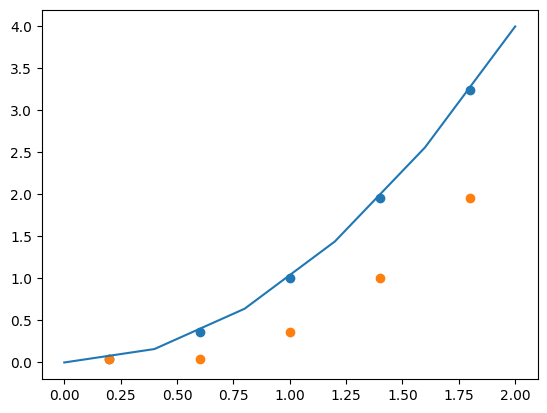

4.85722573273506e-17
0.32000000000000006
0.6400000000000001
0.9600000000000002
1.28


In [26]:

x1 = np.arange(a + (b-a) / (2 * n), b - (b-a) / (2 * n)+0.00000000000001, (b-a) / n)
y1 = []
for i in x1:
    y1.append(f(i))
fd = int_new_prep(x_mas, f_mas)
y2 = []
for i in x1:
    y2.append(int_new(x_mas, f_mas, i, fd))
plt.plot(x_mas, f_mas)
plt.scatter(x1,y1)
plt.scatter(x1,y2)
plt.show()
for i in range(len(y1)):
    print(y1[i] - y2[i])

In [8]:
def ff(x):
    return 3 ** (x)
x = np.arange(-1, 1.+0.00000000000001, 1)
fm = []
for i in x:
    fm.append(ff(i))
fdd = int_new_prep(x, fm)
fdd

{(0.0, 1.0): 2.0,
 (-1.0, 0.0): 0.6666666666666667,
 (-1.0, 1.0): 0.6666666666666666}